# Covid-19 Trend Analysis & Time-Series Forecasting

*In this project, I developed an experimental approach to analyse the trend of the Covid-19 pandemic all over India. For this experiment I mailny used some popular python packages like - **pandas**, **numpy** for computational purpose; **matplotlib**, **plotly**, **seaborn**, **dash** for visualization purpose and **sklearn** for importing the ML model. I developed an interactive dashboard for displaying the Covid-19 trend for each state of India. Finally, I trained **Support Vector Machine (SVM)** model on the time series data of total Confirmed cases and the model achieved significant accuracy on the validation data.*

## Importing Certain Libraries

In [1]:
import math
import pandas as pd
import numpy as np
import time

import matplotlib.pylab as plt
import matplotlib.dates as mdates
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns;

from ipywidgets import widgets
from IPython.display import display

from sklearn.svm import SVR

plt.style.use('fivethirtyeight')
%matplotlib inline

C:\Users\Arunava\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Read the Dataset

In [2]:
df = pd.read_csv('covid_19_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [4]:
print(df.shape)
df.head(10)

(306429, 8)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


## Data Pre-processing

In [5]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)
print(df.shape)
df.head(10)

(306429, 6)


,Date,State,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
5,01/22/2020,Guangdong,Mainland China,26.0,0.0,0.0
6,01/22/2020,Guangxi,Mainland China,2.0,0.0,0.0
7,01/22/2020,Guizhou,Mainland China,1.0,0.0,0.0
8,01/22/2020,Hainan,Mainland China,4.0,0.0,0.0
9,01/22/2020,Hebei,Mainland China,1.0,0.0,0.0


In [6]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
df.head(10)

,Date,State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
5,2020-01-22,Guangdong,Mainland China,26.0,0.0,0.0
6,2020-01-22,Guangxi,Mainland China,2.0,0.0,0.0
7,2020-01-22,Guizhou,Mainland China,1.0,0.0,0.0
8,2020-01-22,Hainan,Mainland China,4.0,0.0,0.0
9,2020-01-22,Hebei,Mainland China,1.0,0.0,0.0


In [7]:
df2 = df.groupby(['Date','Country'])[['Date','Country','Confirmed','Deaths','Recovered']].sum().reset_index()
df2.to_csv("Covid19 Final Data.csv")
print(df2.shape)
df2.head(10)

(87281, 5)


,Date,Country,Confirmed,Deaths,Recovered
0,2020-01-22,China,0.0,0.0,0.0
1,2020-01-22,Hong Kong,0.0,0.0,0.0
2,2020-01-22,Japan,2.0,0.0,0.0
3,2020-01-22,Kiribati,0.0,0.0,0.0
4,2020-01-22,Macau,1.0,0.0,0.0
5,2020-01-22,Mainland China,547.0,17.0,28.0
6,2020-01-22,South Korea,1.0,0.0,0.0
7,2020-01-22,Taiwan,1.0,0.0,0.0
8,2020-01-22,Thailand,4.0,0.0,2.0
9,2020-01-22,US,1.0,0.0,0.0


In [8]:
countries = df2['Country'].unique()
print("Total number of Countries = ", len(countries))

Total number of Countries =  229


## Finding the Country wise Overall Trends

In [9]:
#Finding the country wise total nos. of confirmed, death & recoverd case(s) and their percentage.
TotalConfirmed, TotalRecovered, TotalDeath = 0, 0, 0
SumConfirmed, SumRecovered, SumDeath = 0, 0, 0
PerConfirmed, PerRecovered, PerDeath = 0.0, 0.0, 0.0

TotalConfirmed = df2['Confirmed'].sum()
TotalRecovered = df2['Recovered'].sum()
TotalDeath = df2['Deaths'].sum()

print("The Total no. of Confirmed cases in All over world = ", TotalConfirmed)
print("The Total no. of Recovered cases in All over world = ", TotalRecovered)
print("The Total no. of Death cases in All over world = ", TotalDeath)

country = input("Enter the name of the country : ")
for idx in range(0,len(countries)):
    if countries[idx] == country:
        C = df2[df2['Country']==countries[idx]]

SumConfirmed = C['Confirmed'].sum()
SumRecovered = C['Recovered'].sum()
SumDeath = C['Deaths'].sum()

PerConfirmed = (SumConfirmed/TotalConfirmed)*100
PerRecovered = (SumRecovered/TotalRecovered)*100
PerDeath = (SumDeath/TotalDeath)*100

print("The Total no. of Confirmed cases in ", country, " = ", round(SumConfirmed), "& The Percentage is = ", round(PerConfirmed,2), "%")
print("The Total no. of Recovered cases in ", country, " = ", round(SumRecovered), "& The Percentage is = ", round(PerRecovered,2), "%")
print("The Total no. of Death cases in ", country, " = ", round(SumDeath), "& The Percentage is = ", round(PerDeath,2), "%")

The Total no. of Confirmed cases in All over world =  26252051758.0
The Total no. of Recovered cases in All over world =  15450237912.0
The Total no. of Death cases in All over world =  624013017.0
Enter the name of the country : Germany
The Total no. of Confirmed cases in  Germany  =  524166833.0 & The Percentage is =  2.0 %
The Total no. of Recovered cases in  Germany  =  453383253.0 & The Percentage is =  2.93 %
The Total no. of Death cases in  Germany  =  13364216.0 & The Percentage is =  2.14 %


In [10]:
df3 = df2.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()
print(df3.shape)
df3.head(10)

(494, 4)


,Date,Confirmed,Deaths,Recovered
0,2020-01-22,557.0,17.0,30.0
1,2020-01-23,1097.0,34.0,60.0
2,2020-01-24,941.0,26.0,39.0
3,2020-01-25,1437.0,42.0,42.0
4,2020-01-26,2118.0,56.0,56.0
5,2020-01-27,2927.0,82.0,65.0
6,2020-01-28,5578.0,131.0,108.0
7,2020-01-29,6165.0,133.0,127.0
8,2020-01-30,8235.0,171.0,145.0
9,2020-01-31,9925.0,213.0,225.0


## Visualization of the Country wise Trend

In [11]:
geo=countries

def print_country(Country):
    fig = go.Figure()
    for idx in range(0,len(countries)):
        if countries[idx] == Country:
            C = df2[df2['Country']==countries[idx]].reset_index()
    fig.add_trace(go.Scatter(x=C['Date'],y=C['Confirmed'],name='Confirmed Rate'))
    fig.add_trace(go.Scatter(x=C['Date'],y=C['Deaths'],name='Death Rate'))
    fig.add_trace(go.Scatter(x=C['Date'],y=C['Recovered'],name='Recovered Rate'))

    GraphTitle = "Covid-19 Trend in "+Country
    fig.update_layout(
        title=GraphTitle,
        xaxis_title="Dates",
        yaxis_title="Number of cases",
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="#7f7f7f"
        )
    )

    fig.show()

scW = widgets.Dropdown(options=geo)
init = scW.value
countryW = widgets.Dropdown(options=geo)
j = widgets.interactive(print_country, Country=countryW)
display(j)

interactive(children=(Dropdown(description='Country', options=('China', 'Hong Kong', 'Japan', 'Kiribati', 'Mac…

## Visualization of the World Wide Trend

In [12]:
fig = go.Figure()
C = df3
fig.add_trace(go.Scatter(x=C['Date'],y=C['Confirmed'],name='Confirmed Rate'))
fig.add_trace(go.Scatter(x=C['Date'],y=C['Deaths'],name='Death Rate'))
fig.add_trace(go.Scatter(x=C['Date'],y=C['Recovered'],name='Recovered Rate'))

GraphTitle = "Covid-19 Trend in World"
fig.update_layout(
    title=GraphTitle,
    xaxis_title="Dates",
    yaxis_title="Number of cases",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)

fig.show()

## Comparing the Total Trends of some countries

In [13]:
df4 = df2.groupby(['Country'])[['Date','Country','Confirmed','Deaths','Recovered']].sum().reset_index()
print(df4.shape)
df4.head(10)

(229, 4)


,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,17026442.0,669075.0,13464399.0
3,Albania,19768869.0,375955.0,13945256.0
4,Algeria,27684358.0,834464.0,18959299.0
5,Andorra,2379802.0,32100.0,2162473.0
6,Angola,4764863.0,116489.0,3683041.0
7,Antigua and Barbuda,143868.0,4059.0,109958.0
8,Argentina,504802880.0,12112441.0,438750295.0
9,Armenia,42536277.0,770759.0,37101575.0


In [14]:
some_countries = 'US', 'India', 'Brazil', 'Russia', 'France', 'UK', 'Turkey', 'Argentina', 'Colombia', 'Spain', 'Iran', 'Italy'
df5 = df4.loc[df4['Country'].isin(some_countries)]
df5 = df5.convert_dtypes()
df5 = df5.sort_values(by=['Confirmed'], ascending=False)
df5 = df5.reset_index(drop=True)
df5.head(12)

,Country,Confirmed,Deaths,Recovered
0,US,6049145667,123303762,503370956
1,India,3226768088,44424723,2900589824
2,Brazil,2653587540,72624610,2313677028
3,Russia,930548849,18363719,790705716
4,France,855188962,22720818,69407433
5,UK,783794384,29171984,2327572
6,Spain,649111763,19065104,61193618
7,Italy,636694305,26000702,487799849
8,Turkey,618940956,6841158,564170558
9,Colombia,515307146,13981703,468747010


### Visualization of Covid-19 Trend in most affected cuntries

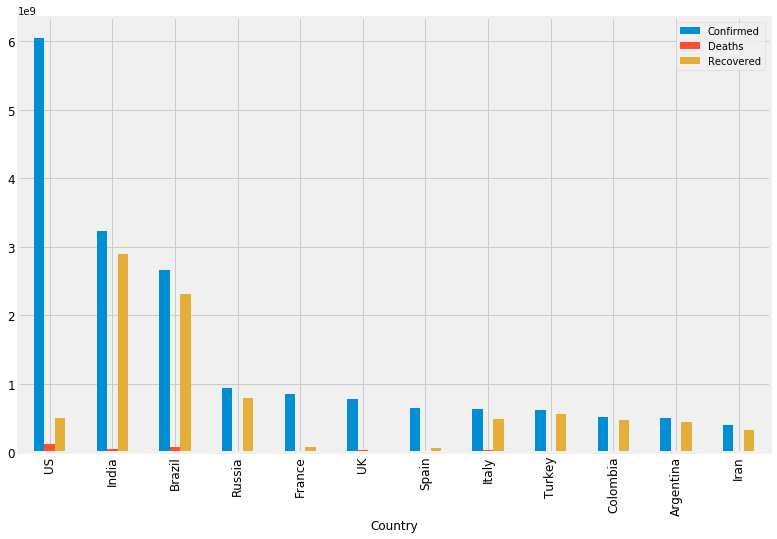

In [15]:
df5.plot(x="Country", y=["Confirmed", "Deaths", "Recovered"], kind="bar", figsize=(12, 8), fontsize=12)

## Support Vector Machine

### Initial Data Preparation

In [16]:
daily_count = pd.DataFrame()
daily_count[["Date", "Confirmed"]] = df3[['Date', 'Confirmed']]
daily_count['Date'] = pd.to_datetime(daily_count['Date'])
daily_count.head(10)

,Date,Confirmed
0,2020-01-22,557.0
1,2020-01-23,1097.0
2,2020-01-24,941.0
3,2020-01-25,1437.0
4,2020-01-26,2118.0
5,2020-01-27,2927.0
6,2020-01-28,5578.0
7,2020-01-29,6165.0
8,2020-01-30,8235.0
9,2020-01-31,9925.0


In [17]:
# Store the original dates for plotting the predicitons
org_dates = daily_count['Date']

# convert to ints
daily_count['Date'] = daily_count['Date'].map(mdates.date2num)

daily_count.head(10)

,Date,Confirmed
0,737446.0,557.0
1,737447.0,1097.0
2,737448.0,941.0
3,737449.0,1437.0
4,737450.0,2118.0
5,737451.0,2927.0
6,737452.0,5578.0
7,737453.0,6165.0
8,737454.0,8235.0
9,737455.0,9925.0


### Visualization of Final Data

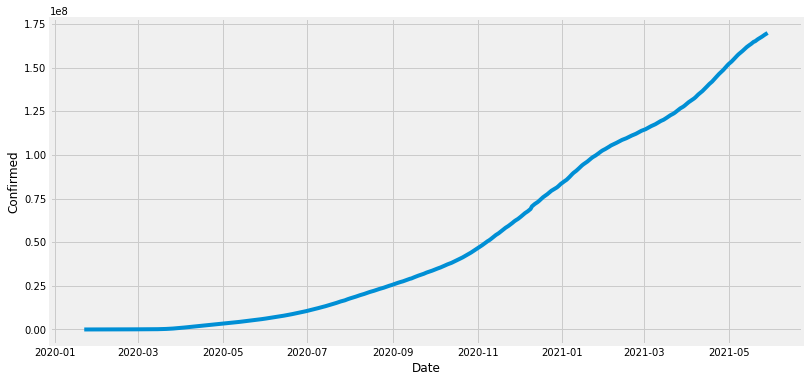

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.plot(org_dates, daily_count["Confirmed"])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Confirmed', fontsize=12)
plt.show()

### Spliting Train & Test Data

In [19]:
def sample_first_prows(data, perc=0.8):
    return data.head(int(len(data)*(perc)))

train = sample_first_prows(daily_count)
test = daily_count.iloc[max(train.index):]
train_org_dates = sample_first_prows(org_dates)
test_org_dates = org_dates.iloc[max(train_org_dates.index):]
train_org_dates = pd.Series(train_org_dates)
test_org_dates = pd.Series(test_org_dates)

In [20]:
train.head(10)

,Date,Confirmed
0,737446.0,557.0
1,737447.0,1097.0
2,737448.0,941.0
3,737449.0,1437.0
4,737450.0,2118.0
5,737451.0,2927.0
6,737452.0,5578.0
7,737453.0,6165.0
8,737454.0,8235.0
9,737455.0,9925.0


In [21]:
test.head(10)

,Date,Confirmed
394,737840.0,110789361.0
395,737841.0,111159816.0
396,737842.0,111474262.0
397,737843.0,111762700.0
398,737844.0,112151553.0
399,737845.0,112596489.0
400,737846.0,113043967.0
401,737847.0,113487006.0
402,737848.0,113876236.0
403,737849.0,114179745.0


### Final Data Preparation

In [22]:
dates = daily_count['Date'].to_numpy()
confirmed = daily_count['Confirmed'].to_numpy()

train_dates = train['Date'].to_numpy()
train_confirmed = train['Confirmed'].to_numpy()

test_dates = test['Date'].to_numpy()
test_confirmed = test['Confirmed'].to_numpy()

In [23]:
#Convert to 1d Vector
train_dates = np.reshape(train_dates, (len(train_dates), 1))
train_confirmed = np.reshape(train_confirmed, (len(train_confirmed), 1))
test_dates = np.reshape(test_dates, (len(test_dates), 1))
test_confirmed = np.reshape(test_confirmed, (len(test_confirmed), 1))

### Train the Model

In [24]:
svr_rbf = SVR(kernel= 'rbf', C= 10e6, gamma= 0.00001)
svr_rbf.fit(train_dates, train_confirmed)

C:\Users\Arunava\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=10000000.0, gamma=1e-05)

### Visualization of the Training, Validation and Prediction Data

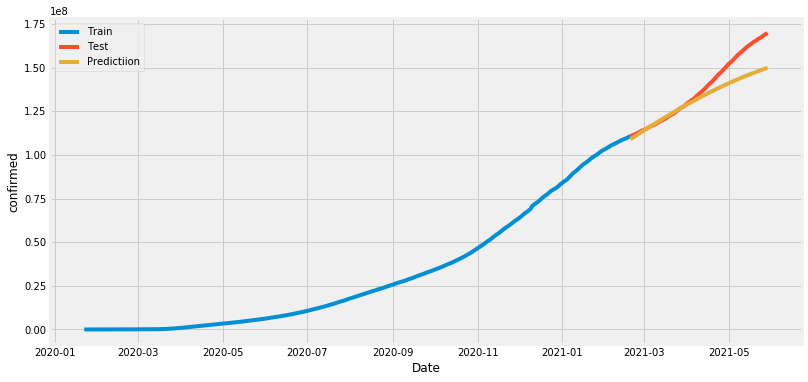

In [25]:
plt.figure(figsize = (12,6))
plt.plot(train_org_dates, train_confirmed, label= 'Train')
plt.plot(test_org_dates, test_confirmed, label= 'Test')
plt.plot(test_org_dates, svr_rbf.predict(test_dates), label= 'Predictiion')
plt.title = 'Daily Confirmed Cases'
plt.xlabel('Date')
plt.ylabel('confirmed')
plt.legend()
plt.show()

### Prediction Accuracy

In [26]:
pred_acc = svr_rbf.score(test_dates, test_confirmed)
print("The prediction accuracy = "+str(round(pred_acc*100, 2))+"%")

The prediction accuracy = 74.88%
